In [1]:
import sys
#sys.path.append('/home/hice1/dnguyen409/.local/lib/python3.10/site-packages')
#!{sys.executable} -m pip install transformers
!wget -P data/go-emotions/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv;
!wget -P data/go-emotions/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv;
!wget -P data/go-emotions/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv;

--2025-04-13 13:59:45--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.122.207, 142.250.105.207, 64.233.185.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/go-emotions/goemotions_1.csv.4’

goemotions_1.csv.4  100%[===================>]  13.52M  --.-KB/s    in 0.1s    

2025-04-13 13:59:45 (108 MB/s) - ‘data/go-emotions/goemotions_1.csv.4’ saved [14174600/14174600]

--2025-04-13 13:59:46--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.105.207, 64.233.185.207, 64.233.177.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.105.207|:443... connected.
HTTP request sent, awaiting

In [2]:
! /usr/local/lib/python3.10/dist-packages -m pip install transformers

/bin/bash: line 1: /usr/local/lib/python3.10/dist-packages: No such file or directory


In [6]:
from transformers import AutoTokenizer
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import random_split, Dataset, DataLoader 

/Users/achyutannarayanan/Desktop/College/AI/4644/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [7]:
df1 = pd.read_csv("data/go-emotions/goemotions_1.csv")
df2 = pd.read_csv("data/go-emotions/goemotions_2.csv")
df3 = pd.read_csv("data/go-emotions/goemotions_3.csv")
#df_ = pd.read_csv('data/go-emotions/multi_emotion_classifications_onehot.csv')


df = pd.concat([df1, df2, df3])
df = df[~df['example_very_unclear']]
df.drop(columns=['example_very_unclear', 'rater_id', 'created_utc', 'link_id', 'parent_id', 'subreddit', 'author', 'id'], inplace=True)
#df_.columns = df.columns

#df = pd.concat([df, df_])

class_names = df.columns[1:].tolist()
df = df.reset_index(drop=True)

In [8]:
df

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,"Well, I'm glad you're out of all that now. How...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207810,Everyone likes [NAME].,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207811,Well when you’ve imported about a gazillion of...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207812,That looks amazing,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfa = df.drop(columns=['text'])

In [5]:
smallest_sample = np.min(np.sum(dfa, axis=0))

In [6]:
smallest_sample = 3000

In [7]:



balanced_rows = []


for emotion in df.columns:
    if emotion == 'text':
        continue
    emotion_df = df[df[emotion] == 1]

    if len(emotion_df) < smallest_sample:
        sampled = emotion_df.sample(n=len(emotion_df), random_state=42)
    else:
        sampled = emotion_df.sample(n=smallest_sample, random_state=42)
    balanced_rows.append(sampled)

balanced_df = pd.concat(balanced_rows).sample(frac=1, random_state=42).reset_index(drop=True)


In [8]:
balanced_df

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,I REALLY hate this one,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Das pretty sweet. No-look throw!,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Great analogy:),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,He said some facts and you accused him for bei...,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sorry bb :( I understand that feeling all too ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76070,You hang your head in shame. Not because of th...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76071,You shouldn't force someone to come out you kn...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76072,Done it since I was a kid I was very edgy,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
76073,"""THE SAMPLE SUCKS! THAT TOWN HALL MEETING WASN...",1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        p_t = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - p_t)**self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Bag of Words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [50]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

In [51]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [36]:
y = df.drop(columns=['text']).values

In [37]:
class BoWClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BoWClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  


In [ ]:
from torch.utils.data import DataLoader, random_split

def compute_accuracy(outputs, labels, threshold=0.5):
    preds = torch.sigmoid(outputs) >= threshold
    correct = (preds == labels.int()).sum().float()
    accuracy = correct / labels.numel()
    return accuracy.item()

def predict_bow(model, dataloader, device, threshold=0.5):
    model.eval()
    predictions = []
    with torch.no_grad():
        for bow_vector, _ in dataloader:
            bow_vector = bow_vector.to(device)
            outputs = model(bow_vector)
            preds = (torch.sigmoid(outputs) >= threshold).float()
            predictions.append(preds)
    return torch.vstack(predictions)


class BoWDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        bow_vector = self.X[idx].toarray().squeeze()  
        label = self.y[idx]
        return torch.tensor(bow_vector, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)




def train_bow(model, dataset, criterion, optimizer, device, epochs=30):
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    generator = torch.Generator().manual_seed(42)
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
    history = [[], []]

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_accuracy = 0

        for bow_vector, labels in train_loader:
            bow_vector = bow_vector.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(bow_vector)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_accuracy += compute_accuracy(outputs, labels)

        avg_train_loss = epoch_loss / len(train_loader)
        avg_train_accuracy = epoch_accuracy / len(train_loader)
        history[0].append((avg_train_loss, avg_train_accuracy))

        model.eval()
        val_loss = 0
        val_accuracy = 0
        with torch.no_grad():
            for bow_vector, labels in val_loader:
                bow_vector = bow_vector.to(device)
                labels = labels.to(device)
                outputs = model(bow_vector)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_accuracy += compute_accuracy(outputs, labels)

        avg_val_loss = val_loss / len(val_loader)
        avg_val_accuracy = val_accuracy / len(val_loader)
        history[1].append((avg_val_loss, avg_val_accuracy))
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}, "
              f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_accuracy:.4f}")

    return history, val_loader


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
dataset = BoWDataset(X, y)

Using device: cpu


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        p_t = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - p_t)**self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

In [41]:
input_dim = X.shape[1]
output_dim = y.shape[1]

model = BoWClassifier(input_dim, 64, output_dim)
model = model.to(device)

In [42]:
print('starting...')
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


criterion = FocalLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

history, val_loader = train_bow(model, dataset, criterion, optimizer, device, epochs=4)

preds = predict_bow(model, val_loader, device)

print("Predictions on validation set:")
print(preds)

starting...
Epoch [1/4], Train Loss: 0.6067, Train Accuracy: 0.7911, Val Loss: 0.5622, Val Accuracy: 0.7982
Epoch [2/4], Train Loss: 0.4953, Train Accuracy: 0.8154, Val Loss: 0.5611, Val Accuracy: 0.8086
Epoch [3/4], Train Loss: 0.4471, Train Accuracy: 0.8277, Val Loss: 0.5730, Val Accuracy: 0.8180
Epoch [4/4], Train Loss: 0.4163, Train Accuracy: 0.8377, Val Loss: 0.5907, Val Accuracy: 0.8258
Predictions on validation set:
tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 1.,  ..., 0., 0., 1.],
        [0., 0., 1.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 0., 0., 1.]])


In [43]:
torch.save(model.state_dict(), "BOW.pth")

In [44]:
model_pth = 'BOW.pth'

In [52]:
from sklearn.metrics import f1_score

# if you don't want to run Execute Code/Training.
# upload .pth file downloaded in Training if you're in a new session.

model_pth = "BOW.pth" # change this if you name things like a weirdo

# loaded_model = LSTMConvModel(
#     vocab_size=tokenizer.vocab_size,
#     embedding_dim=300,
#     hidden_size=128,
#     num_classes=28
# )
with open('count_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
    
    
X = vectorizer.transform(df['text'])
y = df.drop(columns=['text']).values

val_dataset = BoWDataset(X, y)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

input_dim = len(vectorizer.get_feature_names_out())

output_dim = 28

loaded_model = BoWClassifier(input_dim, 64, output_dim)


loaded_model.load_state_dict(torch.load(model_pth))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)
loaded_model.eval()




print("a")

# for predicting new text using given model
# requires you run Preprocess and Setup Code sections to define class_names

import torch

def predict_emotion_bow(text, model, vectorizer, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"), thresholds=None, showProbs=False, returnOne=False):
    bow_vector = vectorizer.transform([text]).toarray()  
    bow_tensor = torch.tensor(bow_vector, dtype=torch.float32).to(device)
    
    with torch.no_grad():
        outputs = model(bow_tensor)
        probs = torch.sigmoid(outputs).flatten()

    if thresholds is None:
        threshold_tensor = torch.full_like(probs, 0.5)
    else:
        threshold_tensor = torch.tensor(thresholds, dtype=probs.dtype, device=probs.device)

    preds = (probs >= threshold_tensor).cpu().int().numpy()

    if showProbs:  # Show probabilities of each class
        annotated_probs = {class_names[i]: probs[i].item() for i in range(len(class_names))}
        sorted_probs = dict(sorted(annotated_probs.items(), key=lambda item: item[1], reverse=True))
        print(f'Class probabilities for "{text}": {sorted_probs}')

    if returnOne:  # Return only the highest probability class, ignoring thresholds
        return class_names[probs.argmax().item()]

    return [class_names[i] for i, val in enumerate(preds) if val == 1]


def tune_thresholds_bow(model, val_loader, step=0.05, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    model.eval()
    all_outputs = []
    all_labels = []

    with torch.no_grad():
        for bow_vector, labels in val_loader:
            bow_vector = bow_vector.to(device)
            labels = labels.to(device)

            outputs = model(bow_vector)
            probs = torch.sigmoid(outputs)

            all_outputs.append(probs.cpu())
            all_labels.append(labels.cpu())
    
    all_outputs = torch.cat(all_outputs)
    all_labels = torch.cat(all_labels)

    num_classes = all_labels.shape[1]
    thresholds = []

    for i in range(num_classes):
        best_threshold = 0.5
        best_f1 = 0.0
        for threshold in np.arange(0.1, 1.0 + step, step):
            preds = (all_outputs[:, i] >= threshold).int().numpy()
            true = all_labels[:, i].int().numpy()
            current_f1 = f1_score(true, preds, zero_division=0)
            if current_f1 > best_f1:
                best_f1 = current_f1
                best_threshold = threshold
        thresholds.append(best_threshold)

    print("Optimal thresholds per class:")
    for idx, thr in enumerate(thresholds):
        print(f"Label {idx}: {thr:.2f}")
    
    return thresholds


thresholds = tune_thresholds_bow(model=loaded_model, val_loader=val_loader, device=device)

a
Optimal thresholds per class:
Label 0: 0.85
Label 1: 0.85
Label 2: 0.85
Label 3: 0.85
Label 4: 0.85
Label 5: 0.80
Label 6: 0.85
Label 7: 0.80
Label 8: 0.85
Label 9: 0.80
Label 10: 0.85
Label 11: 0.85
Label 12: 0.75
Label 13: 0.80
Label 14: 0.85
Label 15: 0.90
Label 16: 0.70
Label 17: 0.85
Label 18: 0.85
Label 19: 0.80
Label 20: 0.85
Label 21: 0.75
Label 22: 0.85
Label 23: 0.80
Label 24: 0.80
Label 25: 0.80
Label 26: 0.85
Label 27: 0.85


F1 Score: 0.5023698320592354


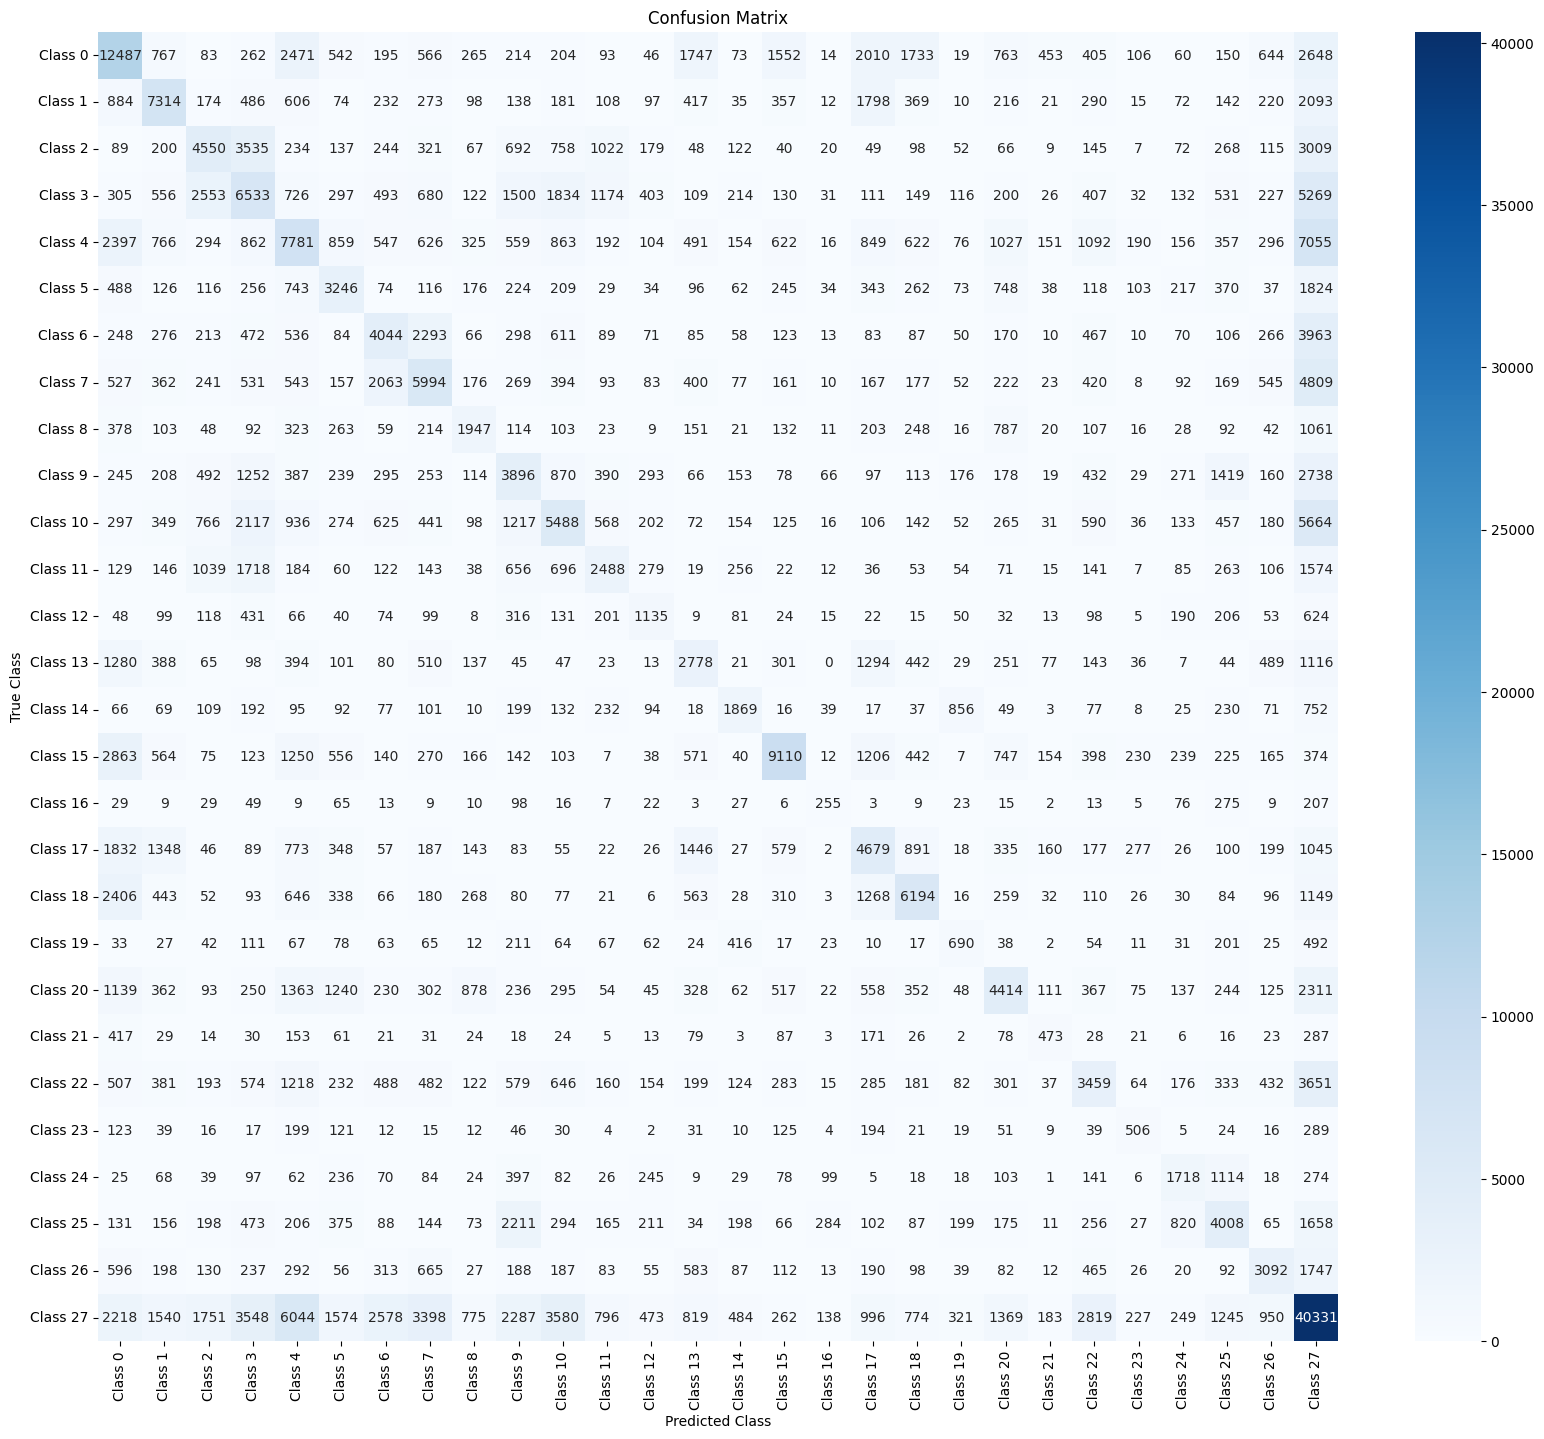

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, f1_score
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

def compute_confusion_matrix_bow(model, val_loader, thresholds, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for bow_vector, labels in val_loader:
            bow_vector = bow_vector.to(device)
            labels = labels.to(device)

            outputs = model(bow_vector)
            probs = torch.sigmoid(outputs)

            preds = (probs >= torch.tensor(thresholds, dtype=probs.dtype, device=probs.device)).int().cpu().numpy()

            all_preds.append(preds)
            all_labels.append(labels.cpu().numpy())

    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    

    num_classes = all_preds.shape[1]
    cm = np.zeros((num_classes, num_classes), dtype=int)  
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print("F1 Score: " + str(f1))

    for i in range(all_preds.shape[0]):
        for c1 in range(num_classes):
            if all_labels[i, c1] == 1: 
                for c2 in range(num_classes):
                    if all_preds[i, c2] == 1:  
                        cm[c1, c2] += 1
    
    plt.figure(figsize=(20, 17))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()
    
    return cm



cm = compute_confusion_matrix_bow(loaded_model, val_loader, thresholds, device)

# LSTM Classifier

In [32]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_classes,
                 num_layers=1, dropout=0.2, bidirectional=True):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0,
            bidirectional=bidirectional,
        )
        self.bidirectional = bidirectional
        lstm_output_dim = hidden_size * 2 if bidirectional else hidden_size
        self.fc = nn.Linear(lstm_output_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask=None):
        embedded = self.embedding(input_ids) 

        lstm_out, (h_n, c_n) = self.lstm(embedded)

        if self.bidirectional:
            forward_hidden = h_n[-2, :, :]  
            backward_hidden = h_n[-1, :, :] 
            hidden = torch.cat([forward_hidden, backward_hidden], dim=1)  
        else:
            hidden = h_n[-1, :, :]  

        out = self.dropout(hidden)
        out = self.fc(out)  

        return out

def preprocess_texts(texts):
    return tokenizer(
        texts,
        max_length=150,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

class GoEmotionsDataset(Dataset):
    def __init__(self, df, text, predict_only=False):
        tokenized = preprocess_texts(text)
        self.input_ids = tokenized["input_ids"]
        self.attention_mask = tokenized["attention_mask"]
        if not predict_only:
            self.labels = torch.tensor(df.iloc[:, 1:].values, dtype=torch.float32)
        else:
            self.labels = None

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.input_ids[idx], self.attention_mask[idx], self.labels[idx]
        else:
            return self.input_ids[idx], self.attention_mask[idx], None


def compute_f1(outputs, labels, threshold=0.5):
    preds = torch.sigmoid(outputs) >= threshold
    f1 = f1_score(labels.cpu(), preds.cpu(), zero_division=0, average='macro')
    return f1

def train_lstm(model, dataset, criterion, optimizer, device, epochs=30):
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    generator = torch.Generator().manual_seed(42)
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
    history = [[], []]

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_accuracy = 0

        for input_ids, attention_mask, labels in train_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_accuracy += compute_f1(outputs, labels)

        avg_train_loss = epoch_loss / len(train_loader)
        avg_train_accuracy = epoch_accuracy / len(train_loader)
        history[0].append((avg_train_loss, avg_train_accuracy))

        model.eval()
        val_loss = 0
        val_accuracy = 0
        with torch.no_grad():
            for input_ids, attention_mask, labels in val_loader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                labels = labels.to(device)
                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_accuracy += compute_f1(outputs, labels)

        avg_val_loss = val_loss / len(val_loader)
        avg_val_accuracy = val_accuracy / len(val_loader)
        history[1].append((avg_val_loss, avg_val_accuracy))
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, Train F1: {avg_train_accuracy:.4f}, "
              f"Val Loss: {avg_val_loss:.4f}, Val F1: {avg_val_accuracy:.4f}")

    return history, val_loader

def predict(model, dataloader, device, threshold=0.5):
    model.eval()
    predictions = []
    with torch.no_grad():
        for input_ids, attention_mask, _ in dataloader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            outputs = model(input_ids, attention_mask)
            preds = torch.sigmoid(outputs) >= threshold
            predictions.append(preds)
    return torch.vstack(predictions)



In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', padding_side="left")
dataset = GoEmotionsDataset(df, df["text"].tolist())

Using device: cuda


In [35]:
from sklearn.metrics import f1_score



print('starting...')
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
model = LSTMModel(
    vocab_size=tokenizer.vocab_size,
    embedding_dim=300,
    hidden_size=256,
    num_classes=28,
    dropout=0.2,
).to(device)

criterion = FocalLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

history, val_loader = train_lstm(model, dataset, criterion, optimizer, device, epochs=20)

preds = predict(model, val_loader, device)
print("Predictions on validation set:")
print(preds)

starting...
Epoch [1/20], Train Loss: 0.6612, Train F1: 0.1263, Val Loss: 0.5963, Val F1: 0.1486
Epoch [2/20], Train Loss: 0.5669, Train F1: 0.1513, Val Loss: 0.5576, Val F1: 0.1539
Epoch [3/20], Train Loss: 0.5300, Train F1: 0.1571, Val Loss: 0.5448, Val F1: 0.1526
Epoch [4/20], Train Loss: 0.5049, Train F1: 0.1600, Val Loss: 0.5398, Val F1: 0.1578
Epoch [5/20], Train Loss: 0.4847, Train F1: 0.1621, Val Loss: 0.5399, Val F1: 0.1544
Epoch [6/20], Train Loss: 0.4675, Train F1: 0.1644, Val Loss: 0.5400, Val F1: 0.1563
Epoch [7/20], Train Loss: 0.4519, Train F1: 0.1660, Val Loss: 0.5461, Val F1: 0.1587
Epoch [8/20], Train Loss: 0.4376, Train F1: 0.1678, Val Loss: 0.5512, Val F1: 0.1575
Epoch [9/20], Train Loss: 0.4255, Train F1: 0.1700, Val Loss: 0.5553, Val F1: 0.1565
Epoch [10/20], Train Loss: 0.4142, Train F1: 0.1715, Val Loss: 0.5614, Val F1: 0.1570
Epoch [11/20], Train Loss: 0.4043, Train F1: 0.1731, Val Loss: 0.5673, Val F1: 0.1570


KeyboardInterrupt: 

In [ ]:
import torch
from torchview import draw_graph

# Load the model (replace with your actual model definition)
model = YourModelClass()
model.load_state_dict(torch.load("your_model.pth"))

# Dummy input tensor
input_tensor = torch.randn(1, 3, 224, 224)

# Visualize the model
graph = draw_graph(model, input_size=input_tensor.shape, expand_nested=True)
graph.visual_graph.render("model_architecture", format="png")

In [41]:
torch.save(model.state_dict(), "LSTMDownsampled.pth")
print('Model saved!')

Model saved!


In [20]:
torch.save(model.state_dict(), "LSTM.pth")
print('Model saved!')

Model saved!


In [36]:
model = LSTMModel(
    vocab_size=tokenizer.vocab_size,
    embedding_dim=300,
    hidden_size=256,
    num_classes=28,
    dropout=0.2,
).to(device)

# Hugging Face Transfomer

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss2(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction="mean"):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):

        bce = F.binary_cross_entropy_with_logits(logits, targets, reduction="none")
        p_t = torch.exp(-bce) 
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * bce

        if self.reduction == "mean":
            return focal_loss.mean()
        elif self.reduction == "sum":
            return focal_loss.sum()
        else:
            return focal_loss


In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=28,
    problem_type="multi_label_classification"
).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
def preprocess_texts(texts):
    return tokenizer(
        texts,
        max_length=150,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

class GoEmotionsDataset(Dataset):
    def __init__(self, df, text, predict_only=False):
        tokenized = preprocess_texts(text)
        self.input_ids = tokenized["input_ids"]
        self.attention_mask = tokenized["attention_mask"]
        if not predict_only:
            self.labels = torch.tensor(df.iloc[:, 1:].values, dtype=torch.float32)
        else:
            self.labels = None

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.input_ids[idx], self.attention_mask[idx], self.labels[idx]
        else:
            return self.input_ids[idx], self.attention_mask[idx], None



def compute_f1(outputs, labels, threshold=0.5):
    preds = torch.sigmoid(outputs) >= threshold
    f1 = f1_score(labels.cpu(), preds.cpu(), zero_division=0, average='macro')
    return f1

def train_model(model, dataset, criterion, optimizer, device, epochs=30):
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    generator = torch.Generator().manual_seed(42)
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
    history = [[], []]

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_accuracy = 0

        for input_ids, attention_mask, labels in train_loader:
            #assert input_ids.device == attention_mask.device == labels.device == next(model.parameters()).device
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)

            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)

            logits = outputs.logits
            loss = criterion(logits, labels)
            
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_accuracy += compute_f1(logits, labels)

        avg_train_loss = epoch_loss / len(train_loader)
        avg_train_accuracy = epoch_accuracy / len(train_loader)
        history[0].append((avg_train_loss, avg_train_accuracy))

        model.eval()
        val_loss = 0
        val_accuracy = 0
        with torch.no_grad():
            for input_ids, attention_mask, labels in val_loader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                labels = labels.to(device)
                outputs = model(input_ids, attention_mask)
                logits = outputs.logits
                loss = criterion(logits, labels)

                val_loss += loss.item()
                val_accuracy += compute_f1(logits, labels)

        avg_val_loss = val_loss / len(val_loader)
        avg_val_accuracy = val_accuracy / len(val_loader)
        history[1].append((avg_val_loss, avg_val_accuracy))
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, Train F1: {avg_train_accuracy:.4f}, "
              f"Val Loss: {avg_val_loss:.4f}, Val F1: {avg_val_accuracy:.4f}")

    return history, val_loader

def predict(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds = []
    with torch.no_grad():
        for input_ids, attention_mask, _ in dataloader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            logits = model(input_ids, attention_mask).logits
            preds = (torch.sigmoid(logits) >= threshold).float()
            all_preds.append(preds.cpu())
    return torch.vstack(all_preds)



In [7]:

print("Using device:", device)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', padding_side="left")
dataset = GoEmotionsDataset(df, df["text"].tolist())

Using device: cuda


In [9]:
from sklearn.metrics import f1_score


print('starting...')
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
model = model

criterion = FocalLoss2().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

history, val_loader = train_model(model, dataset, criterion, optimizer, device, epochs=3)


preds = predict(model, val_loader, device)
print("Predictions on validation set:")
print(preds)

starting...
Epoch [1/3], Train Loss: 0.0467, Train F1: 0.0004, Val Loss: 0.0453, Val F1: 0.0000
Epoch [2/3], Train Loss: 0.0452, Train F1: 0.0000, Val Loss: 0.0452, Val F1: 0.0000


# LSTM Conv (IGNORE)

In [50]:
import torch
import torch.nn as nn

class LSTMConvModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_classes,
                 num_layers=2, dropout=0.3, bidirectional=True, conv_filters=64, kernel_size=3, pool_kernel_size=2):
        super(LSTMConvModel, self).__init__()


        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
    
        self.conv1d_1 = nn.Conv1d(in_channels=embedding_dim, out_channels=conv_filters, kernel_size=kernel_size, padding=1)
        self.bn1 = nn.BatchNorm1d(conv_filters)  
        self.relu1 = nn.ReLU()

      
        self.pool1 = nn.MaxPool1d(kernel_size=pool_kernel_size)

   
        self.conv1d_2 = nn.Conv1d(in_channels=conv_filters, out_channels=conv_filters, kernel_size=kernel_size, padding=1)
        self.bn2 = nn.BatchNorm1d(conv_filters)  
        self.relu2 = nn.ReLU()


        self.lstm = nn.LSTM(
            input_size=conv_filters, 
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0,
            bidirectional=bidirectional
        )

        lstm_output_dim = hidden_size * 2 if bidirectional else hidden_size
        self.fc = nn.Linear(lstm_output_dim, num_classes)

        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask=None):

        embedded = self.embedding(input_ids) 


        conv_out1 = self.conv1d_1(embedded.permute(0, 2, 1))  
        conv_out1 = self.bn1(conv_out1)
        conv_out1 = self.relu1(conv_out1)

   
        conv_out1 = self.pool1(conv_out1) 


        conv_out2 = self.conv1d_2(conv_out1)  
        conv_out2 = self.bn2(conv_out2)
        conv_out2 = self.relu2(conv_out2)

  
        conv_out2 = conv_out2.permute(0, 2, 1) 

  
        lstm_out, (h_n, c_n) = self.lstm(conv_out2)

        if self.lstm.bidirectional:
            forward_hidden = h_n[-2, :, :]  
            backward_hidden = h_n[-1, :, :]  
            hidden = torch.cat([forward_hidden, backward_hidden], dim=1)
        else:
            hidden = h_n[-1, :, :]  

        out = self.dropout(hidden)
        out = self.fc(out)

        return out


In [51]:
print('starting...')
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
model = LSTMConvModel(
    vocab_size=tokenizer.vocab_size,
    embedding_dim=300,
    hidden_size=256,
    num_classes=28,
    dropout=0.2
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

history, val_loader = train_lstm(model, dataset, criterion, optimizer, device, epochs=10)

preds = predict(model, val_loader, device)
print("Predictions on validation set:")
print(preds)

starting...


KeyboardInterrupt: 

In [25]:
torch.save(model.state_dict(), "GoEmotionsConvLSTM.pth")
print('Model saved!')

Model saved!


# Loading Model Up Again

In [30]:
from sklearn.metrics import f1_score

# if you don't want to run Execute Code/Training.
# upload .pth file downloaded in Training if you're in a new session.

model_pth = "LSTM.pth" # change this if you name things like a weirdo

# loaded_model = LSTMConvModel(
#     vocab_size=tokenizer.vocab_size,
#     embedding_dim=300,
#     hidden_size=128,
#     num_classes=28
# )

loaded_model = LSTMModel(
    vocab_size=tokenizer.vocab_size,
    embedding_dim=300,
    hidden_size=256,
    num_classes=28,
    dropout=0.2
).to(device)

loaded_model.load_state_dict(torch.load(model_pth))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)
loaded_model.eval()

val_dataset = GoEmotionsDataset(df, df["text"].tolist())
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# for predicting new text using given model
# requires you run Preprocess and Setup Code sections to define class_names

def predict_emotion(text, model=loaded_model, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"), thresholds=None, showProbs=False, returnOne=False):
    inputs = tokenizer(
        text,
        max_length=150,
        padding='max_length',
        truncation=True,
        return_tensors='pt',
    )
    
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(inputs['input_ids'], inputs['attention_mask'])
        probs = torch.sigmoid(outputs).flatten()

    if thresholds is None:
        threshold_tensor = torch.full_like(probs, 0.5)
    else:
        threshold_tensor = torch.tensor(thresholds, dtype=probs.dtype, device=probs.device)

    preds = (probs >= threshold_tensor).cpu().int().numpy()

    if showProbs:  # showProbs displays the probability of each class.
        annotated_probs = {class_names[i]: probs[i].item() for i in range(len(class_names))}
        sorted_probs = dict(sorted(annotated_probs.items(), key=lambda item: item[1], reverse=True))
        print(f'Class probabilities for "{text}": {sorted_probs}')

    if returnOne:  # returnOne returns only the highest probability class, ignoring thresholds.
        return class_names[probs.argmax().item()]

    return [class_names[i] for i, val in enumerate(preds) if val == 1]

def tune_thresholds(model=loaded_model, val_loader=val_loader, step=0.05, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    model.eval()
    all_outputs = []
    all_labels = []

    with torch.no_grad():
        for input_ids, attention_mask, labels in val_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            
            outputs = model(input_ids, attention_mask)
            probs = torch.sigmoid(outputs)
            
            all_outputs.append(probs.cpu())
            all_labels.append(labels.cpu())
    
    all_outputs = torch.cat(all_outputs)
    all_labels = torch.cat(all_labels)

    num_classes = all_labels.shape[1]
    thresholds = []

    for i in range(num_classes):
        best_threshold = 0.5
        best_f1 = 0.0
        for threshold in np.arange(0.1, 1.0 + step, step):
            preds = (all_outputs[:, i] >= threshold).int().numpy()
            true = all_labels[:, i].int().numpy()
            current_f1 = f1_score(true, preds, zero_division=0)
            if current_f1 > best_f1:
                best_f1 = current_f1
                best_threshold = threshold
        thresholds.append(best_threshold)

    print("Optimal thresholds per class:")
    for idx, thr in enumerate(thresholds):
        print(f"Label {idx}: {thr:.2f}")
    return thresholds

thresholds = tune_thresholds(model=loaded_model, val_loader=val_loader, device=device)

Optimal thresholds per class:
Label 0: 0.85
Label 1: 0.85
Label 2: 0.85
Label 3: 0.80
Label 4: 0.80
Label 5: 0.80
Label 6: 0.85
Label 7: 0.85
Label 8: 0.85
Label 9: 0.75
Label 10: 0.80
Label 11: 0.80
Label 12: 0.70
Label 13: 0.80
Label 14: 0.80
Label 15: 0.90
Label 16: 0.80
Label 17: 0.85
Label 18: 0.85
Label 19: 0.75
Label 20: 0.80
Label 21: 0.65
Label 22: 0.80
Label 23: 0.75
Label 24: 0.80
Label 25: 0.80
Label 26: 0.80
Label 27: 0.85


In [22]:
# batch/basic phrase test

test = [
    "oh my god that is amazing!",
    "fuck you dude.",
    "politics are so scary man",
    "what am i even doing here...?",
    "oh my god",
    "oh my god!",
    "oh my god?",
    "i know you're trying your best.",
    "i hope you're trying your best.",
    "i think you're trying your best.",
    "i know you're not trying your best."
]

for phrase in test:
    print(f'"{phrase}"\n', predict_emotion(text=phrase, thresholds=thresholds, showProbs=True))

Class probabilities for "oh my god that is amazing!": {'admiration': 0.9508458971977234, 'surprise': 0.8980101943016052, 'excitement': 0.866457998752594, 'joy': 0.7324974536895752, 'amusement': 0.4698626399040222, 'gratitude': 0.21553821861743927, 'optimism': 0.043816667050123215, 'pride': 0.031315870583057404, 'realization': 0.02218380756676197, 'relief': 0.012188028544187546, 'approval': 0.011349273845553398, 'neutral': 0.009813380427658558, 'love': 0.009249799884855747, 'anger': 0.0030302598606795073, 'curiosity': 0.002375122159719467, 'annoyance': 0.0019519950728863478, 'caring': 0.0009760374086908996, 'confusion': 0.0005960603011772037, 'fear': 0.0005912663764320314, 'desire': 0.00046007559285499156, 'disgust': 0.00021157444280106574, 'disapproval': 0.00019919413898605853, 'disappointment': 0.00017086787556763738, 'sadness': 0.0001140003587352112, 'embarrassment': 9.511240932624787e-05, 'nervousness': 3.168536568409763e-05, 'grief': 1.5158031601458788e-05, 'remorse': 6.83557573211

In [23]:
# returnOne phrase test

test = [
    "oh my god that is amazing!",
    "fuck you dude.",
    "politics are so scary man",
    "what am i even doing here...?",
    "oh my god",
    "oh my god!",
    "oh my god?",
    "i know you're trying your best.",
    "i hope you're trying your best.",
    "i think you're trying your best.",
    "i know you're not trying your best."
]

for phrase in test:
    print(f'"{phrase}"\n', predict_emotion(text=phrase, thresholds=thresholds, returnOne=True))

"oh my god that is amazing!"
 admiration
"fuck you dude."
 anger
"politics are so scary man"
 fear
"what am i even doing here...?"
 confusion
"oh my god"
 neutral
"oh my god!"
 surprise
"oh my god?"
 surprise
"i know you're trying your best."
 admiration
"i hope you're trying your best."
 optimism
"i think you're trying your best."
 admiration
"i know you're not trying your best."
 disapproval


In [24]:
# threshold option test

test = "i hope you're trying your best"
print(predict_emotion(text=test, thresholds=thresholds))

['caring', 'optimism']


In [25]:
# showProbs option test

test = "hello everyone i'm very cool because i'm an uno draw 4 card irl"
print(predict_emotion(text=test, thresholds=thresholds, showProbs=True, returnOne= True))

Class probabilities for "hello everyone i'm very cool because i'm an uno draw 4 card irl": {'neutral': 0.8867221474647522, 'admiration': 0.8349596858024597, 'approval': 0.7231830358505249, 'joy': 0.6516947150230408, 'amusement': 0.4040043354034424, 'excitement': 0.16850325465202332, 'curiosity': 0.07815144211053848, 'relief': 0.047487370669841766, 'pride': 0.03502197191119194, 'confusion': 0.0290189441293478, 'gratitude': 0.02822885289788246, 'anger': 0.02376353181898594, 'annoyance': 0.012829182669520378, 'optimism': 0.011532671749591827, 'love': 0.009320982731878757, 'surprise': 0.006122378166764975, 'desire': 0.0019937085453420877, 'caring': 0.0008141808211803436, 'fear': 0.00032778389868326485, 'realization': 0.00019368536595720798, 'disappointment': 0.00015000194252934307, 'disapproval': 0.0001395664585288614, 'nervousness': 0.00012456258991733193, 'sadness': 0.00010824086348293349, 'disgust': 9.966053039534017e-05, 'embarrassment': 9.284407133236527e-05, 'grief': 2.35202514886623

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def compute_confusion_matrix(thresholds, model=loaded_model, val_loader=val_loader, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    model.eval()
    all_outputs = []
    all_labels = []

    with torch.no_grad():
        for input_ids, attention_mask, labels in val_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            
            outputs = model(input_ids, attention_mask)
            probs = torch.sigmoid(outputs)  
            
            preds = (probs > torch.tensor(thresholds).to(device)).float()   
            
            all_outputs.append(preds.cpu())
            all_labels.append(labels.cpu())
    

    all_outputs = torch.cat(all_outputs)
    all_labels = torch.cat(all_labels)


    all_outputs = all_outputs.numpy()
    all_labels = all_labels.numpy()

    print("f1 score: " + str(f1_score(all_labels, all_outputs, zero_division=0, average='macro')))

 
    num_classes = all_labels.shape[1]
    cm = np.zeros((num_classes, num_classes), dtype=int)


    for i in range(all_labels.shape[0]): 
        true_class = all_labels[i]  
        pred_class = all_outputs[i]  
        
        for n in range(num_classes):
            if true_class[n] == 1:
                for m in range(num_classes):
                    if pred_class[m] == 1:
                        cm[n, m] += 1

    fig, ax = plt.subplots(figsize=(24, 20))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[f'Class {i}' for i in range(num_classes)], 
                yticklabels=[f'Class {i}' for i in range(num_classes)], ax=ax)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

    return cm


f1 score: 0.4934250984809929


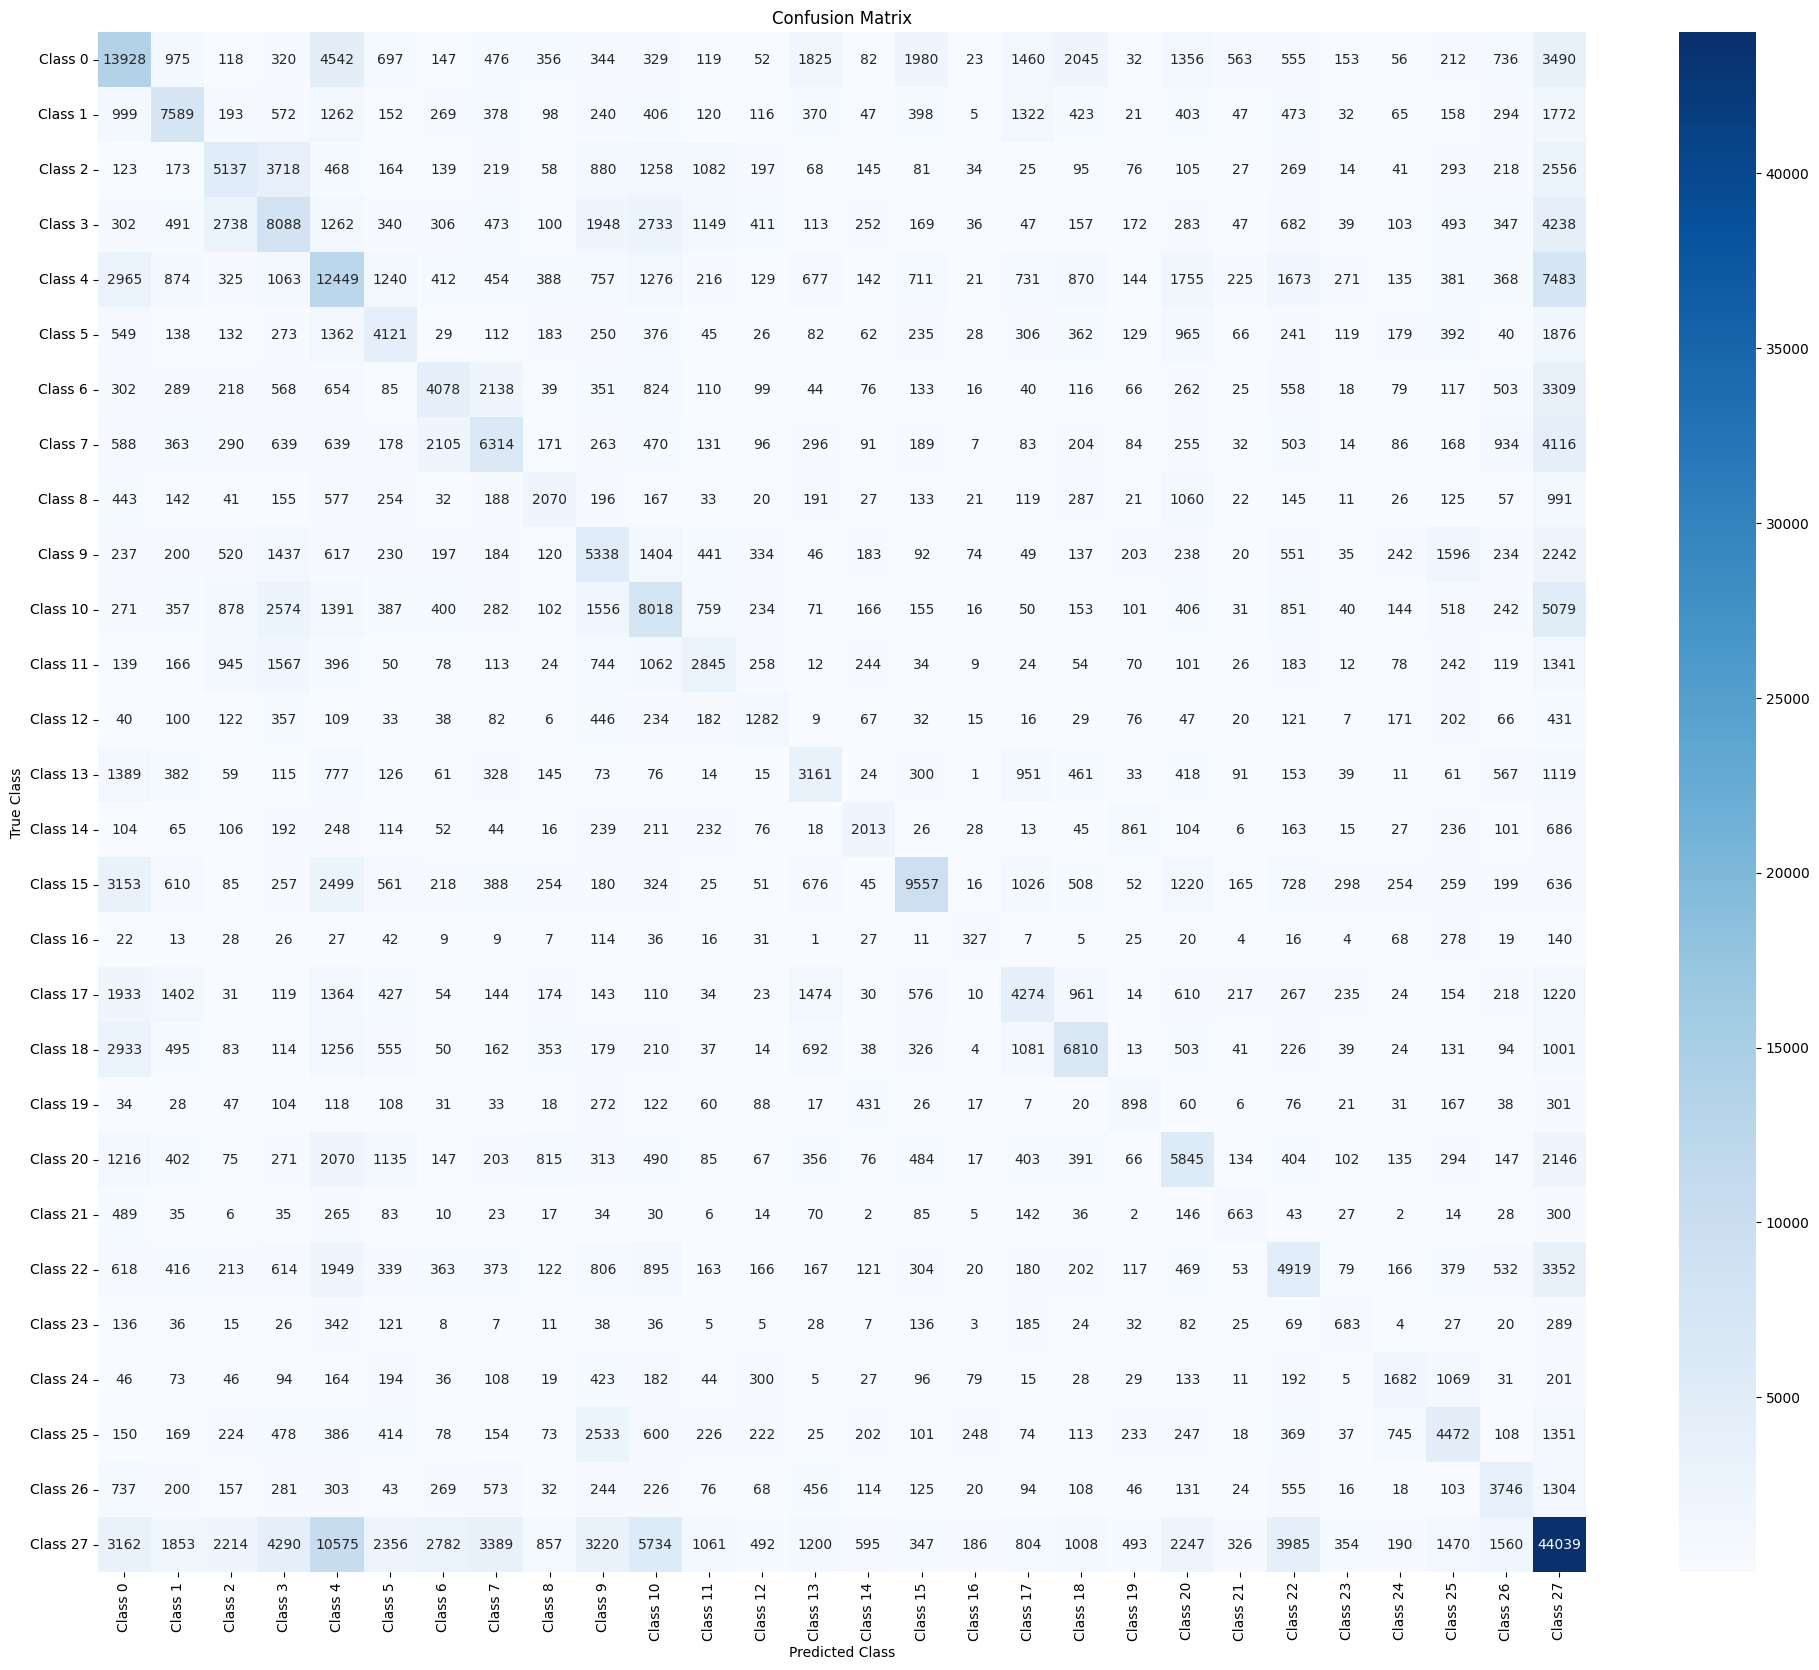

In [28]:
cm = compute_confusion_matrix(thresholds, loaded_model, val_loader)